# AI 2 Exercise Sheet #5: "Building AI Solutions"

## 5.1 Iris Flowers

#### a) You start with using an unsupervised approach to evaluate whether an AI may also be able to identify the different species.
1. Which algorithms could you use for this?

In [1]:
# Clustering algorithms, such as, e.g.:
#     - k-means (builds exactly k clusters)
#     - DBScan (focuses on density)
#     - Agglomerative Clustering (derives a hierarchy of clusters)


#### a) You start with using an unsupervised approach to evaluate whether an AI may also be able to identify the different species.
2. You implement some unsupervised AI. Do the results of the AI differ from your manually derived ones?

1. ORIGINAL CLUSTERS:


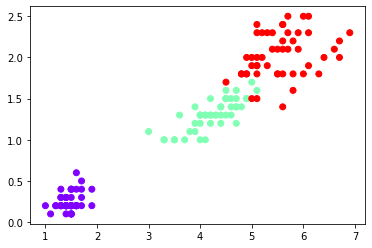

2. COMPUTED CLUSTERS (K-Means):


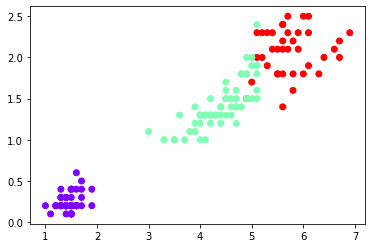

Computed Cluster Centers:
[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [1]:
# Implement, e.g., k-means:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv("iris.csv", delimiter = ";")
data.label = pd.factorize(data.label)[0]
X = data[["a1", "a2", "a3", "a4"]]

# VISUALIZE original data
print("1. ORIGINAL CLUSTERS:")
plt.scatter(X["a3"],X["a4"], c=data.label, cmap='rainbow')
plt.show()
#X = data[["a1", "a2", "a3", "a4"]]

# TRAIN
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# VISUALIZE cluster results
print("2. COMPUTED CLUSTERS (K-Means):")
plt.scatter(X["a3"],X["a4"], c=kmeans.labels_, cmap='rainbow')
plt.show()

# Get computed cluster centers
print("Computed Cluster Centers:")
print(kmeans.cluster_centers_)

# KMeans does actually work pretty well on this dataset!

#### a) You start with using an unsupervised approach to evaluate whether an AI may also be able to identify the different species.
3. Then, you implement further AIs using different algorithms and parameters. Do the results differ?

1. ORIGINAL CLUSTERS:


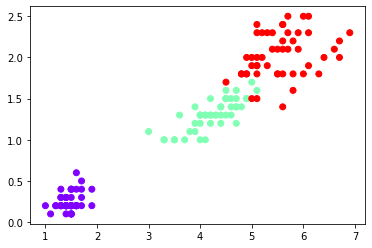

2. COMPUTED CLUSTERS (DBScan):


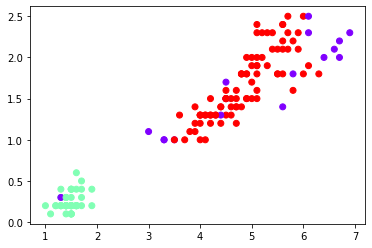

In [2]:
# Implement DBScan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

data = pd.read_csv("iris.csv", delimiter = ";")
data.label = pd.factorize(data.label)[0]
X = data[["a1", "a2", "a3", "a4"]]

# VISUALIZE original data
print("1. ORIGINAL CLUSTERS:")
plt.scatter(X["a3"],X["a4"], c=data.label, cmap='rainbow')
plt.show()


# TRAIN
dbscan = DBSCAN()
dbscan.fit(X)

# VISUALIZE cluster results
print("2. COMPUTED CLUSTERS (DBScan):")
plt.scatter(X["a3"],X["a4"], c=dbscan.labels_, cmap='rainbow')
plt.show()


# DBScan does not work well on this dataset as the clusters cannot be devided based on their density!

1. ORIGINAL CLUSTERS:


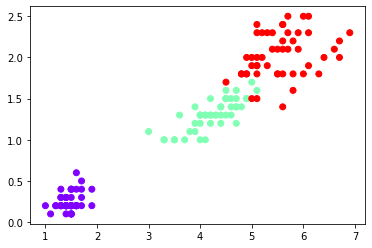

2. COMPUTED CLUSTERS (Agglomerative Clustering):


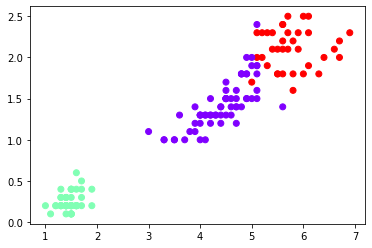

3. Dendrogram


{'icoord': [[85.0, 85.0, 95.0, 95.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [252.5, 252.5, 282.5, 282.5],
  [230.0, 230.0, 267.5, 267.5],
  [202.5, 202.5, 248.75, 248.75],
  [185.0, 185.0, 225.625, 225.625],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [205.3125, 205.3125, 312.5, 312.5],
  [175.0, 175.0, 258.90625, 258.90625],
  [165.0, 165.0, 216.953125, 216.953125],
  [335.0, 335.0, 345.0, 345.0],
  [375.0, 375.0, 385.0, 385.0],
  [415.0, 415.0, 425.0, 425.0],
  [405.0, 405.0, 420.0, 420.0],
  [395.0, 395.0, 412.5, 412.5],
  [380.0, 380.0, 403.75, 403.75],
  [365.0, 365.0, 391.875, 391.875],
  [435.0, 435.0, 445.0, 445.0],
  [378.4375, 378.4375, 440.0, 440.0],
  [355.0, 355.0, 409.21875, 409.21875],
  [340.0, 340.0,

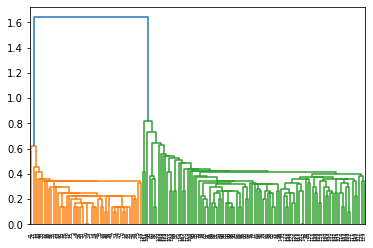

In [3]:
# Implement Agglomerative Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

data = pd.read_csv("iris.csv", delimiter = ";")
data.label = pd.factorize(data.label)[0]
X = data[["a1", "a2", "a3", "a4"]]

# VISUALIZE original data
print("1. ORIGINAL CLUSTERS:")
plt.scatter(X["a3"],X["a4"], c=data.label, cmap='rainbow')
plt.show()

# TRAIN
ac = AgglomerativeClustering(n_clusters=3) # we can tell it, how many clusters we want to get indicated
                                           # in the end (max: number of data points - 1)
ac.fit(X)

# VISUALIZE cluster results
print("2. COMPUTED CLUSTERS (Agglomerative Clustering):")
plt.scatter(X["a3"],X["a4"], c=ac.labels_, cmap='rainbow')
plt.show()

# CREATE DENDOGRAM:
Z = linkage(X) # To be able to use the dendrogram function of scipy with a scikit-learn model
print("3. Dendrogram")
dendrogram(Z)

# Agglomerative Clustering does work well on this dataset! 
# Additionally, we can choose how many clusters we want to see in the end due to its hierarchical form!

#### b) After exploring possibilities of using an unsupervised approach, you want to check whether you can implement a supervised AI that is able to successfully classify the given species and also indicates the value ranges for distinguishing the three species.
1. Which algorithm could you use for this?
2. You implement a supervised AI. How well does it work?

In [4]:
# b-1) Any classification algorithm

# b-2) You can implement, e.g.,  a knn classifier:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

data = pd.read_csv("iris.csv", delimiter = ";")
data.label = pd.factorize(data.label)[0]
X = data[["a1", "a2", "a3", "a4"]]
y = data.label

dt = KNeighborsClassifier(n_neighbors=5)
dt.fit(X,y)

# EVALUATE

dt_predict = dt.predict(X)

print(classification_report(y, dt_predict))
print(confusion_matrix(y, dt_predict))
print("\n")
print("Detailed Accuracy:")
print(accuracy_score(y, dt_predict))

# NOTE: Be careful with applying your models to your training data. Usually, this does not tell us how well
# a model works as a good performance then only tells us how well the algorithm can describe the training data
# and not how well it works on previously unseen data. However, in this subtask, we actually want to see how well
# the algorithm describes our given data which is why it is okay to do this here.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


Detailed Accuracy:
0.9666666666666667
